In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

In [48]:
import csv

In [28]:
os.listdir('/media/yingtao/HDPH-UT/2pin/click_results-a26f-chr/')

['.~lock.Results-yw-1-0801-1-2000.csv#',
 'opto-1-liu63-600.csv',
 'opto-2-liu73-550.csv',
 'opto-3-liu85-00001-850-3980-600.csv',
 'opto-5-liu97-0000-2700-3984-0001-1-1000-700.csv',
 'opto-yw-1-0801-1-2000-500.csv',
 'opto-yw-2-0730-liu67-0000-1-3500-600.csv',
 'opto-yw-3-0804-1-liu106-1-3235-500.csv',
 'opto-yw-4-0804-2-liu107-1-3161-600.csv',
 'Results-1-liu63.csv',
 'Results-2-liu73.csv',
 'Results-3-liu85-00001-850-3980.csv',
 'Results-5-liu97-0000-2700-3984-0001-1-1000.csv',
 'Results-yw-1-0801-1-2000.csv',
 'Results-yw-2-0730-liu67-0000-1-3500.csv',
 'Results-yw-3-0804-1-liu106.csv',
 'Results-yw-4-0804-2-liu107.csv']

In [29]:
folder_path = '/media/yingtao/HDPH-UT/2pin/click_results-a26f-chr/'

In [30]:
paths = [file for file in os.listdir(folder_path)]
paths.sort()

In [36]:
paths = [ 'Results-1-liu63.csv',
 'Results-2-liu73.csv',
 'Results-3-liu85-00001-850-3980.csv',
 'Results-5-liu97-0000-2700-3984-0001-1-1000.csv',
 'Results-yw-1-0801-1-2000.csv',
 'Results-yw-2-0730-liu67-0000-1-3500.csv',
 'Results-yw-3-0804-1-liu106.csv',
 'Results-yw-4-0804-2-liu107.csv']

In [37]:
df = pd.read_csv(os.path.join(folder_path,paths[0]))

In [38]:
def cal_LT_length(df):
    x = df['X'].to_numpy()
    y = df['Y'].to_numpy()
    t = df['t'].to_numpy()
    if x.shape[0]%2!=0:
        print('wrong shape')
    d_all = []
    for i in range(x.shape[0]//2):
        x1,y1,t1 = x[2*i],y[i*2],t[i*2]
        x2,y2,t2 = x[2*i+1],y[i*2+1],t[i*2+1]
        if t1!=t2:
            print('wrong click')
        d = euclidean([x1,y1],[x2,y2])
        d_all.append([d,t1])
    return(np.array(d_all))

In [39]:
def get_lt_length(path):
    df = pd.read_csv(path)
    d = cal_LT_length(df)
    return(d)

In [40]:
d[:][1]

array([17.02938637, 75.        ])

In [59]:
optos[7]

([113, 519, 917, 1315, 1714, 2112, 2510, 2908],
 [312, 718, 1116, 1514, 1912, 2311, 2709, 3107])

In [57]:
range(len(opto_files_paths))

range(0, 8)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7


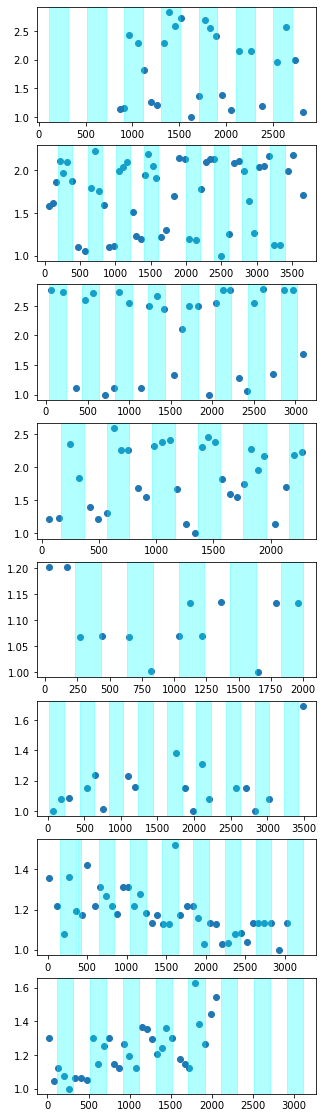

In [67]:
d_all = []
fig, axs = plt.subplots(len(paths),figsize = (5,20))
for num,path in enumerate(paths):
    d = get_lt_length(os.path.join(folder_path,path))
    d_all.append(d)
    axs[num].scatter(d[:,1],d[:,0]/np.amin(d[:,0]))
for num in range(len(opto_files_paths)):
    for n2 in range(len(optos[num][0])):
        print(num,n2)
        axs[num].axvspan(optos[num][0][n2], optos[num][1][n2], alpha=0.3, color='cyan')

In [46]:
opto_files_paths = ['opto-1-liu63-600.csv',
 'opto-2-liu73-550.csv',
 'opto-3-liu85-00001-850-3980-600.csv',
 'opto-5-liu97-0000-2700-3984-0001-1-1000-700.csv',
 'opto-yw-1-0801-1-2000-500.csv',
 'opto-yw-2-0730-liu67-0000-1-3500-600.csv',
 'opto-yw-3-0804-1-liu106-1-3235-500.csv',
 'opto-yw-4-0804-2-liu107-1-3161-600.csv']

In [44]:
def find_boundarys(arr,thre=0.75,ra=15):
        light_on = []
        light_off = []
        if arr[0] == 1.0:
            light_on.append(0)
        for i in range(arr.size-1):
            if arr[i] == 1.0 and arr[i+1]==-1.0:
                if np.mean(arr[max(i-ra,0):i])>thre and np.mean(arr[i:min(i+ra,arr.size)])<-thre:
                    light_off.append(i)
            elif arr[i] == -1.0 and arr[i+1]==1.0:
                if np.mean(arr[max(i-ra,0):i])<-thre and np.mean(arr[i:min(i+ra,arr.size)])>thre:
                    light_on.append(i)
        if arr[-1] == 1.0:
            light_off.append(i)
        return(light_on,light_off)

In [45]:
def get_opto(opto_file_path):
    opto = []
    threshold = float(opto_file_path.split('-')[-1][:-4])
    with open(opto_file_path) as csv_file:
        spamreader = csv.reader(csv_file, delimiter=",")
        for line in spamreader:
            opto.append(line)
    data_o = np.array(opto[1:]).astype(float)
    print(threshold)
    data_o_normalized = np.sign(data_o[:,1]-float(threshold))
    light_on, light_off = find_boundarys(data_o_normalized)
    return(light_on, light_off)

In [64]:
optos= [get_opto(os.path.join(folder_path,i)) for i in opto_files_paths]

600.0
550.0
600.0
700.0
500.0
600.0
500.0
600.0


/home/yingtao/anaconda3/envs/caiman/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yingtao/anaconda3/envs/caiman/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [66]:
optos = [([111, 514, 912, 1311, 1709, 2107, 2505],
  [310, 713, 1111, 1510, 1908, 2306, 2704]),
 ([190, 608, 1006, 1404, 2201, 2599, 2997, 3396],
  [389, 807, 1205, 1603, 2002, 2400, 2798, 3196, 3595]),
 ([40, 436, 834, 1232, 1630, 2029, 2427, 2825],
  [236, 635, 1033, 1431, 1829, 2227, 2626, 3024]),
 ([166, 565, 963, 1361, 1759, 2158], [366, 764, 1162, 1560, 1958, 2283]),
 ([234, 636, 1035, 1433, 1831], [433, 835, 1234, 1632, 1998]),
 ([23, 436, 835, 1233, 1631, 2029, 2428, 2826, 3224],
  [223, 636, 1034, 1432, 1830, 2228, 2627, 3025, 3423]),
 ([163, 388, 645, 1047, 1445, 1844, 2242, 2635, 3033],
  [362, 427, 844, 1246, 1645, 2043, 2441, 2834,3232]),
 ([113, 519, 917, 1315, 1714, 2112, 2510, 2908],
  [312, 718, 1116, 1514, 1912, 2311, 2709, 3107])]

In [65]:
optos

[([111, 514, 912, 1311, 1709, 2107, 2505],
  [310, 713, 1111, 1510, 1908, 2306, 2704]),
 ([190, 608, 1006, 1404, 2201, 2599, 2997, 3396],
  [389, 807, 1205, 1603, 2002, 2400, 2798, 3196, 3595]),
 ([40, 436, 834, 1232, 1630, 2029, 2427, 2825],
  [236, 635, 1033, 1431, 1829, 2227, 2626, 3024]),
 ([166, 565, 963, 1361, 1759, 2158], [366, 764, 1162, 1560, 1958, 2283]),
 ([234, 636, 1035, 1433, 1831], [433, 835, 1234, 1632, 1998]),
 ([23, 436, 835, 1233, 1631, 2029, 2428, 2826, 3224],
  [223, 636, 1034, 1432, 1830, 2228, 2627, 3025, 3423]),
 ([163, 388, 645, 1047, 1445, 1844, 2242, 2635, 3033],
  [362, 427, 844, 1246, 1645, 2043, 2441, 2834]),
 ([0, 113, 519, 917, 1315, 1714, 2112, 2510, 2908],
  [312, 718, 1116, 1514, 1912, 2311, 2709, 3107])]